# Project: Tmdb movies analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

For this analysis we've selected TMDB movie dataframe wich has information on a diffent types of movies, their rating, popularity, production company, budget, revenue etc. The questions we're gonna work on are: Q1:Which genres are most popular from year to year? Q2: What kinds of properties are associated with movies that have high revenues?

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Downloading data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Shape of the dataframe

df.shape

(10866, 21)

In [4]:
# Basic decriptive information about all the columns of the data

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Data types of the columns and missed values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Taking a look on a dataframe i decided to drop columns: homepage, imdb_id, tagline, overview, runtime, keywords, revenue,
# release_date, budget cast. Im not using them in my analysis, since some of them hold no value for the analysis and some of them as budget, revenue got replaced with
# budget_adj, revenue_adj.

df.drop(['homepage', 'imdb_id', 'tagline', 'overview','runtime', 'keywords', 'revenue', 'release_date', 'budget', 'cast'], axis = 1, inplace = True)

In [7]:
# head

df.head()

,id,popularity,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# Lets check again data types before cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   director              10822 non-null  object 
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_year          10866 non-null  int64  
 9   budget_adj            10866 non-null  float64
 10  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [9]:
# Drop duplicated rows

df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [10]:
# Drop NA values

df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9806 non-null   int64  
 1   popularity            9806 non-null   float64
 2   original_title        9806 non-null   object 
 3   director              9806 non-null   object 
 4   genres                9806 non-null   object 
 5   production_companies  9806 non-null   object 
 6   vote_count            9806 non-null   int64  
 7   vote_average          9806 non-null   float64
 8   release_year          9806 non-null   int64  
 9   budget_adj            9806 non-null   float64
 10  revenue_adj           9806 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 919.3+ KB


In [11]:
# Genres column has '|' separator, whitch we need to remove for further analysis. .str.split() will help us

df.genres = df.genres.str.split('|')

In [12]:
# Same with director column values

df.director = df.director.str.split('|')

In [13]:
# Same for production_companies column values

df.production_companies = df.production_companies.str.split('|')

In [14]:
# Checking the result

df.head()

,id,popularity,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,[George Miller],"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,[Robert Schwentke],"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,[J.J. Abrams],"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,[James Wan],"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year?

In [16]:
# Lets work on our first alalysis question.

In [17]:
# We'll create a copy of our cleaned dataframe for this question.

genres_df = df.copy()

In [18]:
# Since main dependant column is 'genres' we have to transform our list values to separate independent values
# for futher analysis. .explode() function will help

genres_df = genres_df.explode('genres')

In [19]:
# Using groupby function will group the year and genres with the mean() values for each genre.
# Also reset_index for returning to dataframe look and new index.

genres_df = genres_df.groupby(['release_year','genres']).popularity.mean().reset_index()

In [20]:
# To find most poopular genre for each year, we'll use groupby() function again for 
# release_year and popularity. idxmax() function will help to get the largest popularity rating that year
# which will give us index.

idx = genres_df.groupby('release_year')['popularity'].idxmax()

In [21]:
# masking genres with our idx

top = genres_df.iloc[idx]

Text(0.5, 1.0, 'Most Popular Genres from Year to Year')

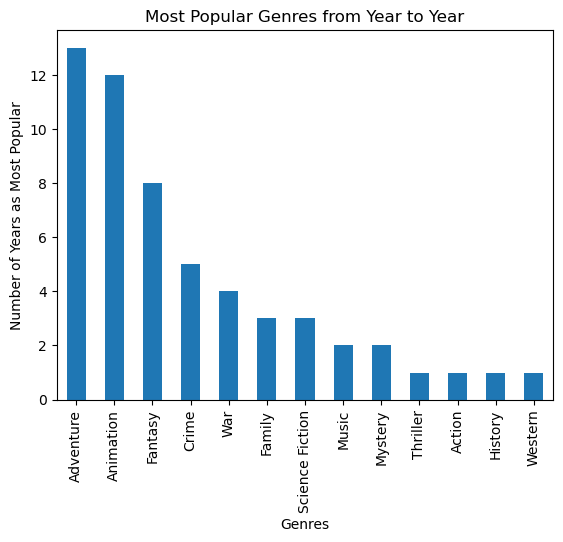

In [22]:
# Count how many genres over the years are most pupular and plotting with barchart.

top.genres.value_counts().plot(kind = 'bar')
plt.xlabel('Genres')
plt.ylabel('Number of Years as Most Popular')
plt.title('Most Popular Genres from Year to Year')

In [23]:
# Chart above shows that from the year 1960 to 2015, most popular movie genres from year to year are:

# Adventure - 13 years total as most popular genre;
# Animation - 12 years total as most poopual genre;
# Fantasy - 8 years total as most popular genre;

# Crime - 5 years total as most popular genre;
# War - 4 years total as most popular genre;
# Family - 3 years total as most popular genre; 
# Science Fiction - 3 years total as most popular genre;
# Music - 2 years total as most popular genre;
# Mystery - 2 years total as most popular genre;
# Thriller - 1 year total as most popular genre;
# Action - 1 year total as most popular genre;
# History - 1 year total as most popular genre;
# Western - 1 year total as most popular genre;

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [25]:
#  Analyzing the distribution of the dependent variable (revenue_adj)
# and some of the independent variables that from common sence might affect
# the revenue: "budget_adj", "popularity", "vote_average"

# Copying our original df and describing

high_revenue_df = df.copy()
high_revenue_df = df[["revenue_adj", "budget_adj", "popularity", "vote_count"]]
high_revenue_df.describe()

,revenue_adj,budget_adj,popularity,vote_count
count,9.806000e+03,9.806000e+03,9806.000000,9806.000000
mean,5.685528e+07,1.935070e+07,0.693143,238.622578
std,1.512243e+08,3.562179e+07,1.035525,602.081472
min,0.000000e+00,0.000000e+00,0.000188,10.000000
25%,0.000000e+00,0.000000e+00,0.231581,18.000000
50%,0.000000e+00,2.410618e+05,0.418756,46.000000
75%,4.255193e+07,2.439107e+07,0.774231,172.000000
max,2.827124e+09,4.250000e+08,32.985763,9767.000000


Text(0, 0.5, 'Frequency')

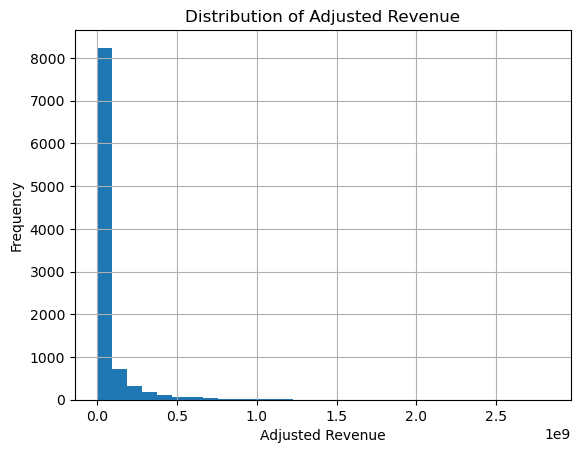

In [26]:
# Plotting a histogram to understand the distribution of our dependent variable (revenue_adj)

high_revenue_df.revenue_adj.hist(bins = 30)
plt.xlabel('Adjusted Revenue')
plt.title(f'Distribution of Adjusted Revenue')
plt.ylabel('Frequency')

In [27]:
# Chart above shows the distribution of Adjusted revenue column. The distribution is very right-skewed, meaning/showing from describe() function that there are too many '0' values.
# Lets fix it. We'll remove all '0' revenue values.

new_high_revenue_df = high_revenue_df[high_revenue_df.revenue_adj != 0]

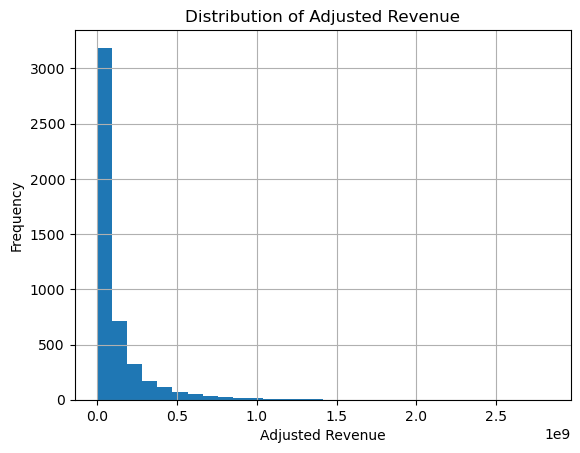

In [28]:
# Lets create function for convinient and simplified plotting

def hist_col(x, y):
        new_high_revenue_df[x].hist(bins = 30)
        plt.xlabel(y)
        plt.title(f'Distribution of {y}')
        plt.ylabel('Frequency')

hist_col('revenue_adj', 'Adjusted Revenue')

In [29]:
# Now distribution look little less skewed to the right.

In [30]:
new_high_revenue_df.describe()

# The mean revenue is approximately 417 million USD.
# The median revenue, which is the 50th percentile, is approximately 81 million USD.
# The minimum and maximum revenue are approximately 2.3 million USD and 2.8 billion USD, respectively.

,revenue_adj,budget_adj,popularity,vote_count
count,4.752000e+03,4.752000e+03,4752.000000,4752.000000
mean,1.173238e+08,3.580858e+07,1.061523,444.651726
std,2.002502e+08,4.395864e+07,1.365493,812.519096
min,2.370705e+00,0.000000e+00,0.001783,10.000000
25%,1.163448e+07,2.912701e+06,0.401694,49.000000
50%,4.572316e+07,2.103337e+07,0.693963,153.000000
75%,1.348632e+08,5.039101e+07,1.225666,446.000000
max,2.827124e+09,4.250000e+08,32.985763,9767.000000


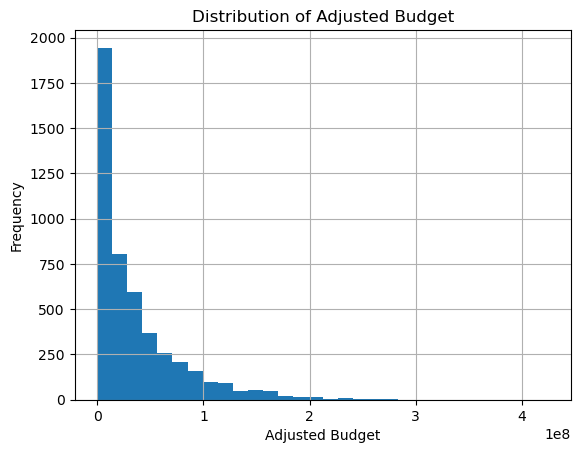

In [31]:
# Plotting a histogram to understand the distribution of our independent variable (budget_adj)

hist_col('budget_adj', 'Adjusted Budget')

In [32]:
# Chart above shows the distribution of Adjusted Budget column (Right-skewed)

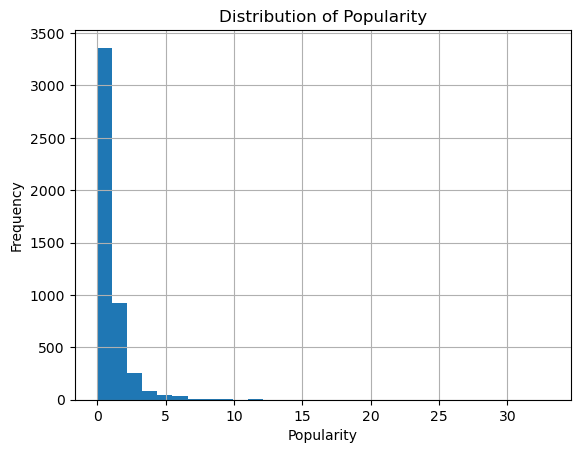

In [33]:
# Plotting a histogram to understand the distribution of our independent variable (popularity)

hist_col('popularity', 'Popularity')

In [34]:
# Chart above shows the distribution of Poopularity column. (Right-skewed)

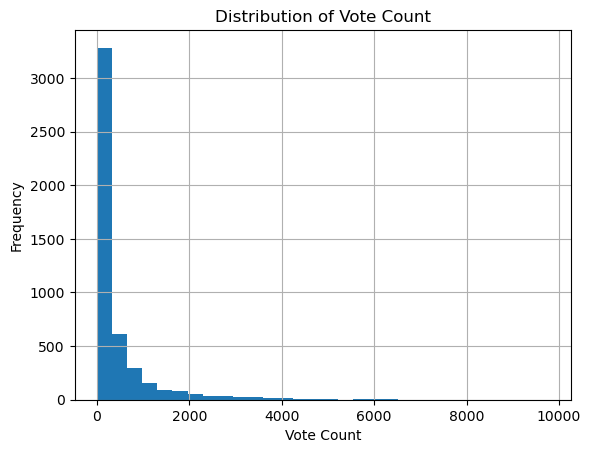

In [35]:
# Plotting a histogram to understand the distribution of our independent variable (vote_count)

hist_col('vote_count', 'Vote Count')

In [36]:
# Chart above shows the distribution of Vote Count column. (Right-skewed)

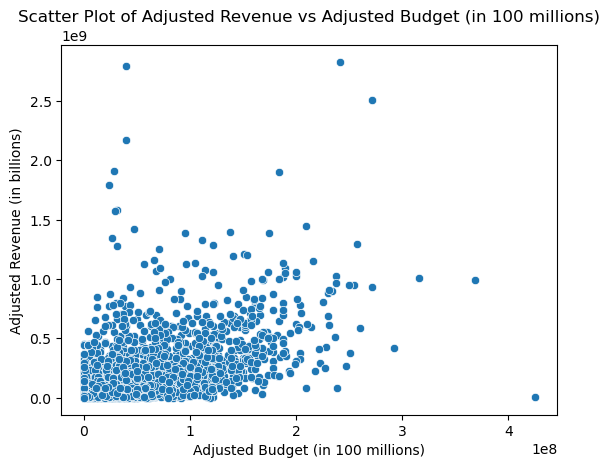

In [37]:
# Analyzing the relationship between the dependent
# variable (revenue_adj) and the independent variable (budget_adj)

# lets create a function for cleaner and easier scattering.

def scatter_revenue (variable, title):
    sns.scatterplot(x=variable , y='revenue_adj', data=new_high_revenue_df)
    plt.title(f'Scatter Plot of Adjusted Revenue vs {title}')
    plt.xlabel(f'{title}')
    plt.ylabel('Adjusted Revenue (in billions)')
    
scatter_revenue('budget_adj', 'Adjusted Budget (in 100 millions)')

In [38]:
# Chart above shows the correlation between Adjusted Revenue vs Adjusted Budget columns,and a positive correlation.

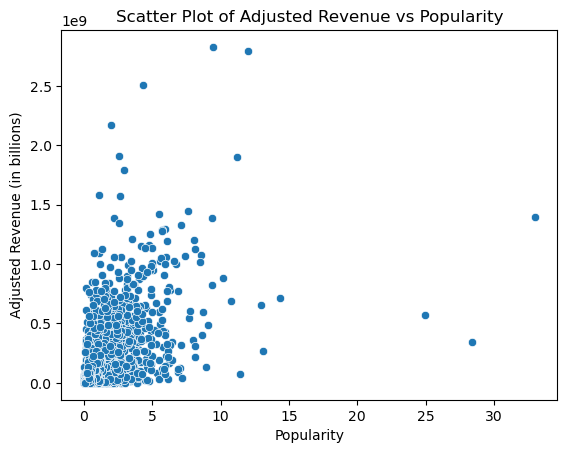

In [39]:
# Analyzing the relationship between the dependent
# variable (revenue_adj) and the independent variable (popularity)

scatter_revenue('popularity', 'Popularity')

In [40]:
# Chart above shows the correlation between Adjusted Revenue vs Popularity columns, and a positive correlation.

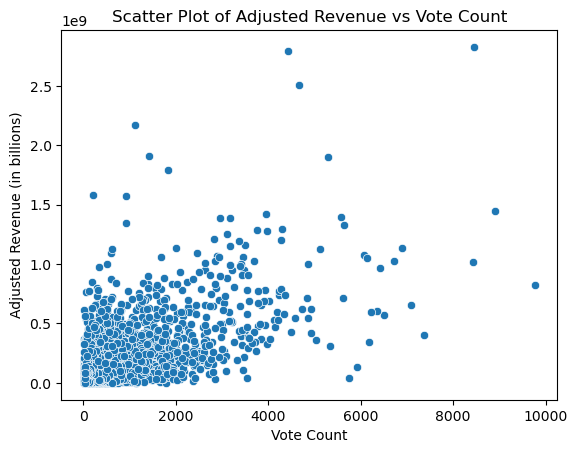

In [41]:
# Analyzing the relationship between the dependent
# variable (revenue_adj) and the independent variable (vote count)

scatter_revenue('vote_count', 'Vote Count')


In [42]:
# Chart above shows the correlation between Adjusted Revenue vs Vote Count columns, and a positive correlation.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Based on the exploratory data analysis (EDA) performed, we can draw the following conclusions:

The dataset contains 9806 samples, each with 11 features (columns).

# Number of Samples and Representativity
With 9806 samples, we have a reasonably large dataset to work with. Given that this dataset spans movies released from the year 1960 to 2015, it seems to have a good representation across different eras of the film industry.


# Missing Values
The original dataset contained 10,866 entries, while the cleaned dataset has been reduced to 9,806 entries, indicating a loss of 1,060 rows. Which is still large dataset to work with.
    For the Q2, we had to reduce our data to 4752 entries, because of missing Adjusted revenue values. It couldn't affect our dataset too much, since we can a see the very strong right-skewed pattern.


# Q1 conclusions
Which genres are most popular from year to year?
Using release_year, genres, popularity columns we were able to find the answer.
Bar chart and statistics show that from the year 1960 to 2015, 3 most popular movie genres from year to year are:

Adventure - 13 years total as most popular genre;
Animation - 12 years total as most poopual genre;
Fantasy - 8 years total as most popular genre;


# Q2 conclusions
What kinds of properties are associated with movies that have high revenues?
We were taking in a sample and testing dependent variable - revenue_adj, and 3 independent variables - budget_adj, popularity and vote_count.

Adjusted Revenue (revenue_adj)
The revenue data is right-skewed, indicating that a few movies generated exceptionally high revenues.
The majority of the movies have revenues below 134 million USD, with a mean revenue of approximately 417 million USD.

Adjusted Budget (budget_adj)
Similar to revenue, the budget data is right-skewed, highlighting that a few movies had significantly higher budgets.
The average budget for the movies in the dataset is approximately 72 million USD.

Popularity
The popularity data also follows a right-skewed distribution, meaning a few movies enjoyed extremely high popularity.
The average popularity score is 1, with a median score of 0.69, indicating a high popularity level for the central tendency of the dataset.

Vote count (vote_count)
The vote_count data also follows a right-skewed distribution, meaning a few movies enjoyed extremely high vote counting.
The average vote count is 444, with a median vote count 153.

Using bar chart for showing distribution, and sacatterplot for showing correlation between revenue and independev variables, we found out:

Budget and Revenue: There is a considerable positive relationship between the budget and revenue, suggesting that investing more in the production of a movie could potentially lead to higher revenues.

Popularity and Revenue: Higher popularity scores are associated with higher revenues, indicating the potential positive impact of marketing and promotions to boost a movie's popularity and, consequently, its revenue.

Vote Count and Revenue: A very high positive correlation between vote count and revenue suggests that movies well-received by the audience, reflected through higher vote counts, tend to generate higher revenues.